In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import numpy as np


In [2]:
def plot_threshold_results(data):
    colors = sns.color_palette("husl", 3)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    thresholds = [float(t) for t in data.keys()]
    f1s = [d['f1'] for d in data.values()]
    recalls = [d['recall'] for d in data.values()]
    precisions = [d['precision'] for d in data.values()]

    data = {
        "F1": f1s,
        "Recall": recalls,
        "Precision": precisions,
    }

    for i, (label, scores) in enumerate(data.items()):
        # Plot the losses
        ax.plot(thresholds, scores, color=colors[i], label=label)
        ax.set_title('Loss per Epoch')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Score')
        ax.set_xticks(np.arange(0, 1, 0.1))
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Find the first threshold where the precision is above 0.9
    threshold_index = next((i for i, precision in enumerate(precisions) if precision > 0.9), None)
    if threshold_index is not None:
        threshold = thresholds[threshold_index]
        ax.axvline(threshold, color='black', linestyle='--')
        ax.text(threshold + 0.01, 0.8, f"Threshold = {threshold:.3f}", fontsize=12)

    ax.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [3]:
def table_threshold_results(data):
    table = PrettyTable()
    table.field_names = ["", "Threshold", "F1", "Recall", "Precision"]

    threshold_index = next((i for i, precision in enumerate(
        [d['precision'] for d in data.values()]) if precision > 0.9), None)

    for i, (threshold, scores) in enumerate(data.items()):
        f1 = scores['f1']
        recall = scores['recall']
        precision = scores['precision']

        if i == threshold_index:
            table.add_row(["\u2192", '\033[1m' + str(threshold) + '\033[0m', '\033[1m' + str(f1) + '\033[0m',
                          '\033[1m' + str(recall) + '\033[0m', '\033[1m' + str(precision) + '\033[0m'])
        else:
            table.add_row(["", threshold, f1, recall, precision])

    print(table)

In [4]:
def plot_curves(data):
    thresholds = [float(key) for key in data.keys()]
    precision = [data[str(threshold)]['precision'] for threshold in thresholds]
    recall = [data[str(threshold)]['recall'] for threshold in thresholds]
    tpr = [data[str(threshold)]['tpr'] for threshold in thresholds]
    fpr = [data[str(threshold)]['fpr'] for threshold in thresholds]

    sns.set(style='darkgrid')
    plt.figure(figsize=(8, 4))

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

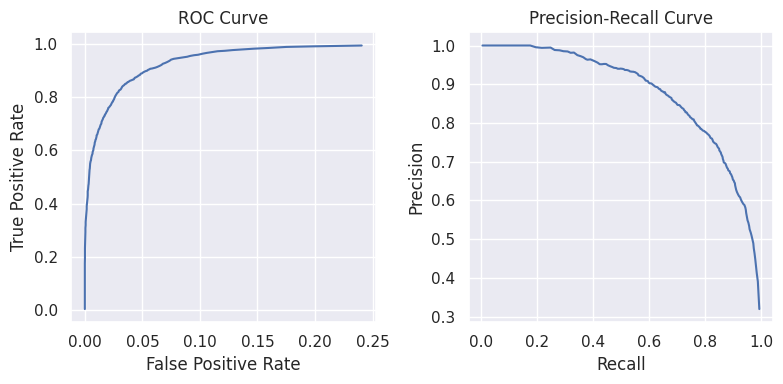

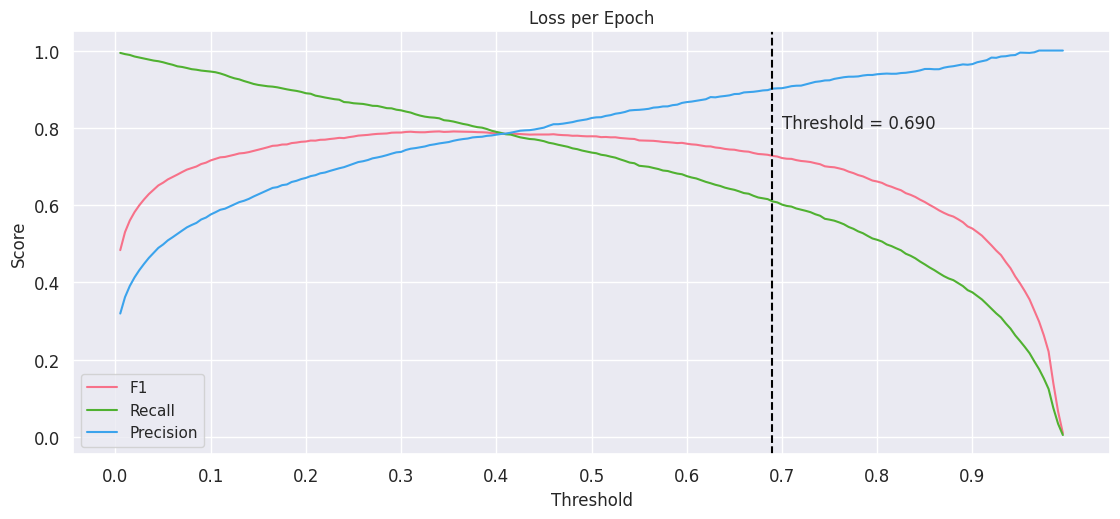

In [5]:
threshold_data = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-7/lightning_logs/version_0/checkpoints/converted/epoch=0_threshold_results.json'
with open(threshold_data, 'r') as f:
    data = json.load(f)

plot_curves(data)
plot_threshold_results(data)
# table_threshold_results(data)

In [6]:
ratios = {
    '100:5:5': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-5-5/checkpoints/converted/epoch=0_threshold_results.json',
    '100:10:10': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-10-10/checkpoints/converted/epoch=0_threshold_results.json',
    '100:10:20': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-10-20/checkpoints/converted/epoch=0_threshold_results.json',
    '100:100:1': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-1_5/checkpoints/converted/epoch=2_threshold_results.json',
    '100:100:10': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-10/checkpoints/converted/epoch=0_threshold_results.json',
    '100:100:50': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-50/checkpoints/converted/epoch=0_threshold_results.json',
    '100:100:100': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-100/checkpoints/converted/epoch=0_threshold_results.json',
    '100:200:50': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-200-50_5/checkpoints/converted/epoch=3_threshold_results.json',
    '100:200:100': '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-200-100/checkpoints/converted/epoch=0_threshold_results.json',
}

ratio_data = {}
for ratio, json_path in ratios.items():
    with open(json_path, 'r') as f:
        data = json.load(f)
        threshold_index = next((i for i, precision in enumerate([d['precision'] for d in data.values()]) if precision > 0.9), None)
        threshold = list(data.keys())[threshold_index]
        ratio_data[ratio] = "{:5.3f}".format(float(threshold))

table = PrettyTable()
table.field_names = ["Data Ratio", "Threshold"]
for ratio, threshold in ratio_data.items():
    table.add_row([ratio, threshold])
print(table)


+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
|   100:5:5   |   0.545   |
|  100:10:10  |   0.600   |
|  100:10:20  |   0.540   |
|  100:100:1  |   0.710   |
|  100:100:10 |   0.455   |
|  100:100:50 |   0.580   |
| 100:100:100 |   0.540   |
|  100:200:50 |   0.740   |
| 100:200:100 |   0.690   |
+-------------+-----------+
